# Bessel Functions

The spherical Bessel and Neumann functions $j_l(x)$ and $n_l(x)$ are, respectively, the regular/irregular (nonsingular/singular at the origin) solutions of the differential equation

$$
x^2 f(x) + 2x f^{\prime}(x) + \left[x^2 - l(l+1)\right] f(x) = 0
$$

They occur in many physical problems, such as the expansion of a plane wave into spherical partial waves

$$
e^{i \mathbf{k}\cdot\mathbf{r}} = \sum_{l=0}^{\infty} i^l (2l+1) j_l(kr) P_l(\cos \theta)
$$

For the first two l values, explicit forms are

$$
\begin{aligned}
j_0(x) &= +\frac{\sin x}{x}, \quad j_1(x) = +\frac{\sin x}{x^2} - \frac{\cos x}{x} \\
n_0(x) &= -\frac{\cos x}{x}, \quad n_1(x) = -\frac{\cos x}{x^2} - \frac{\sin x}{x}
\end{aligned}
$$


The approach we adopt is based on the *recursion relations*

$$
\begin{aligned}
j_{l+1}(x) &= \frac{2l+1}{x} j_l(x) - j_{l-1}(x), \quad (\text{up}) \\
j_{l-1}(x) &= \frac{2l+1}{x} j_l(x) - j_{l+1}(x), \quad (\text{down})
\end{aligned}
$$

These two equations are the same relation, one written for upward recurrence from small to large $l$ values, and the other for downward recurrence from large $l$ to small $l$. With just a few additions and multiplications, recurrence relations permit rapid, simple computation of the entire set of $j_l$ values for fixed $x$ and
all $l$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


def down(x, n: int, m: int):
    j = np.zeros((len(x), m+2), float)
    j[:, m+1] = j[:, m] = 1.0
    for k in range(m, 0, -1):
        j[:, k-1] = ((2*k + 1)/x)*j[:, k] - j[:, k+1]

    return j[:, n]/j[:, 0] * np.sin(x)/x  # Scale solution to known j[0]

In [10]:
Xmax = 12.
Xmin = 0.05
step = 0.05  # Global class variables
start = 50  # Start of iteration

j0 = np.zeros((400), float)
j1 = np.zeros((400), float)
j2 = np.zeros((400), float)
j3 = np.zeros((400), float)

xx = np.arange(Xmin, Xmax, step)
j0 = down(xx, 0, start)
j1 = down(xx, 1, start)
j2 = down(xx, 2, start)
j3 = down(xx, 3, start)

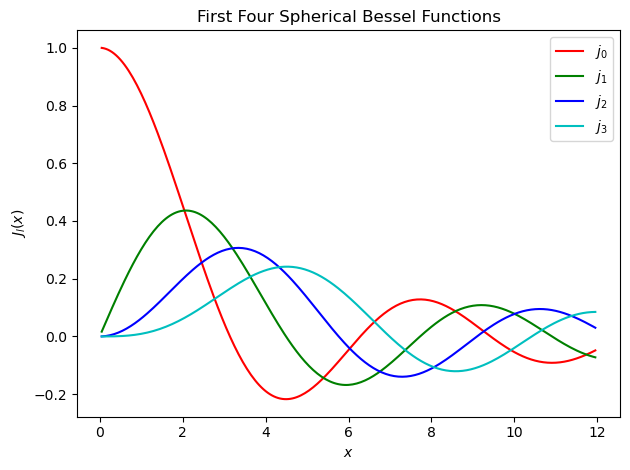

In [12]:
fig = plt.figure()
plt.title("First Four Spherical Bessel Functions")
plt.xlabel('$x$')
plt.ylabel('$J_l(x)$')

plt.plot(xx, j0, 'r', label='$j_0$')
plt.plot(xx, j1, 'g', label='$j_1$')
plt.plot(xx, j2, 'b', label='$j_2$')
plt.plot(xx, j3, 'c', label='$j_3$')
plt.legend(loc='best')

plt.tight_layout()
plt.show()